<a href="https://colab.research.google.com/github/dekapd99/Kaggle-EDA-Heart-Attack-Prediction/blob/master/Kaggle-EDA-Heart-Attack-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get dataset url from github repository
url = "https://raw.githubusercontent.com/dekapd99/Kaggle-EDA-Heart-Attack-Prediction/master/heart.csv"

# Read the dataset with pandas
try:
    df = pd.read_csv(url, delimiter=',')
except pd.errors.ParserError as e:
    print("Error occurred while parsing the CSV file:", e)

df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
new_columns = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df.columns = new_columns
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (303, 14)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Analysis Outputs (1)
* The Data Set consists of 303 Rows and 14 Columns.
* The type of all the variables in the data set are in numerical format. (Integer Or Float)
* According to first impressions, there is no missing value(NaN Value) in the data set.

### 3. Preparation for Exploratory Data Analysis (EDA)

3.1 Examining Missing Values

In [7]:
df.isnull().sum() # The Result = No Missing Value

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
isnull_number = []
for i in df.columns:
  x = df[i].isnull().sum()
  isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Value"])

,Total Missing Value
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


<Axes: >

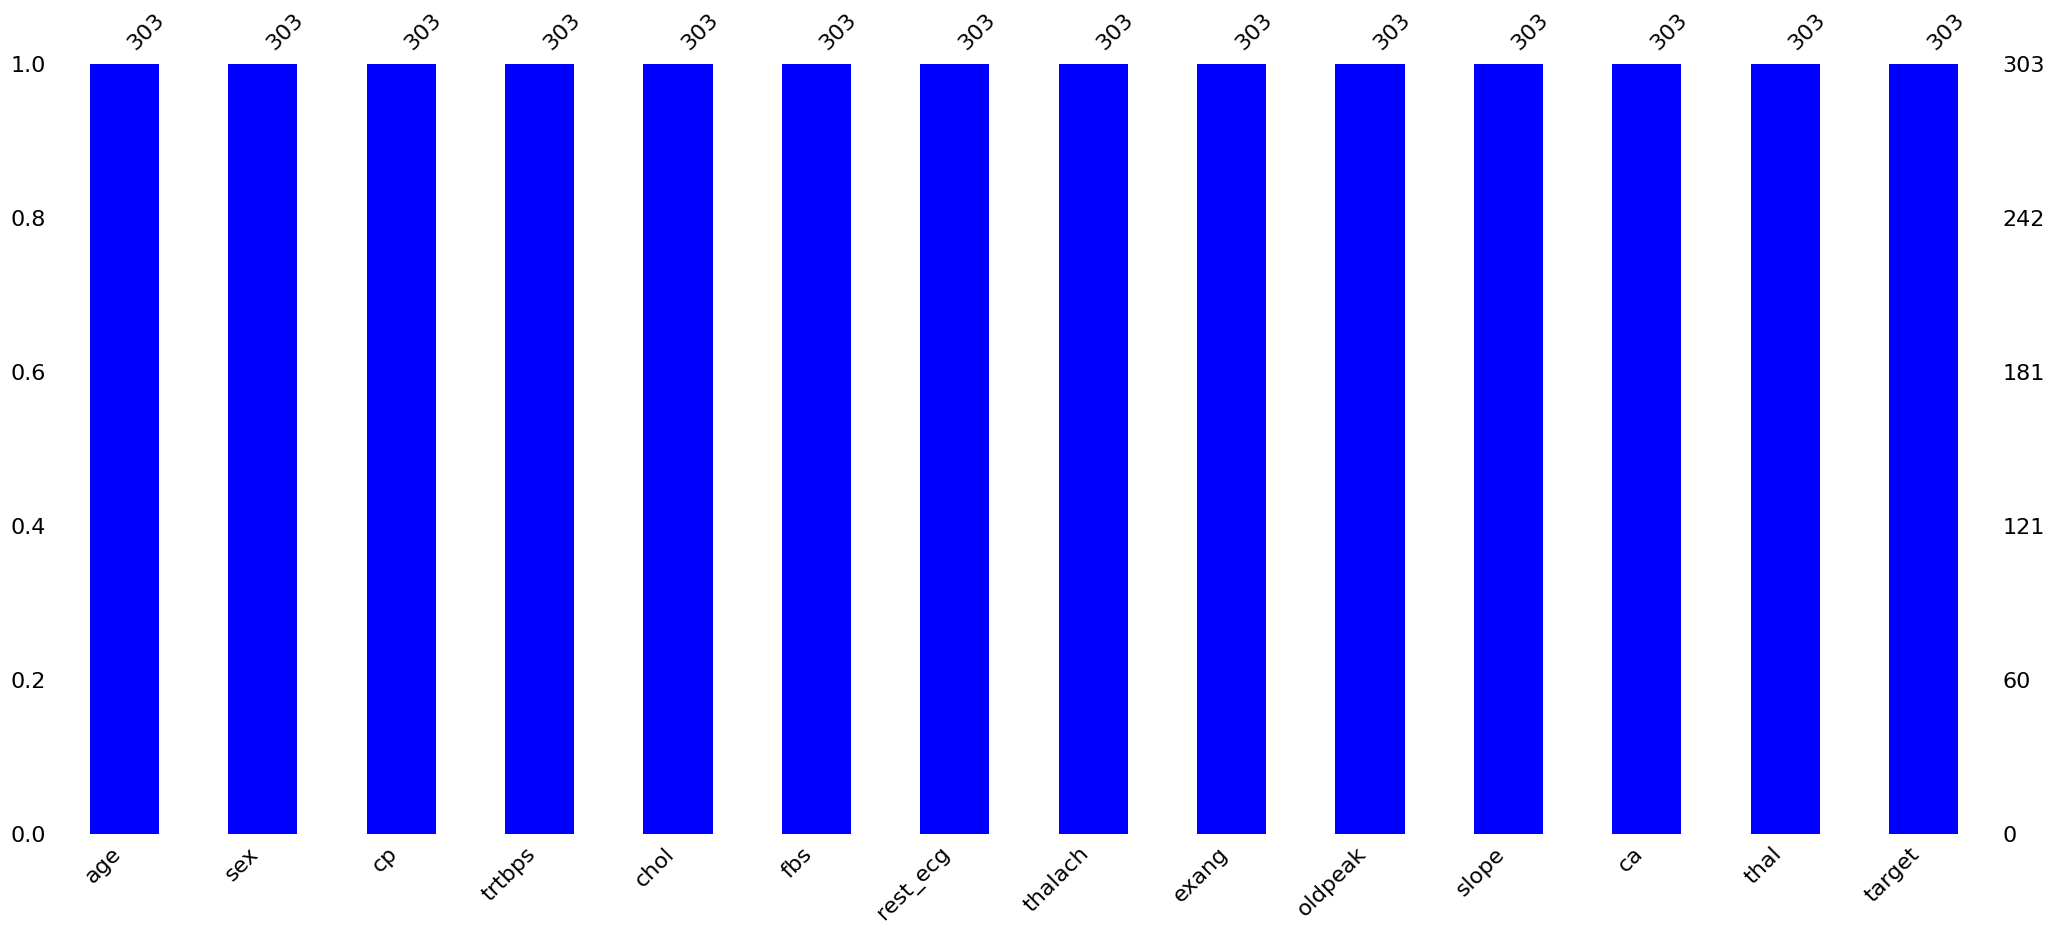

In [9]:
import missingno
missingno.bar(df, color = "b")

3.2 Examining Unique Value

In [10]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
# Looking at CP columns / variable to check the Value and the Count of Each the Same Value
df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [12]:
df["cp"].value_counts().sum()

303

In [13]:
df["cp"].value_counts().count()

4

In [14]:
unique_number = []
for i in df.columns:
  x = df[i].value_counts().count()
  unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Value"])

,Total Unique Value
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


### Analysis Outputs(2)

* **According to the result from the unique value dataframe**;
* We determined the variables with few unique values ​​as categorical variables, and the variables with high unique values ​​as numeric variables.
* In this context, **Numeric Variables**: “age”, “trtbps”, “chol”, “thalach” and “oldpeak ”
* **Categorical Variables**: "sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"
* In the next section, we will separate these 2 groups into 2 different lists.

In [15]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Seperating Numeric & Categoric Data
* Numeric Var = Quantitative Data obtained from a Variable and the value has a sense of size (Age, Temperature, Weight)
* Categoric Var = Symbolic / Qualitative Data but can also be a number (Gender, True / False, Target

In [16]:
numeric_var = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

### Examining Statistics of Variables

In [17]:
# Method of describe() -> Working as removing the missing values in the dataset and returns the result accordingly
# In this case there are no missing value
df[numeric_var].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


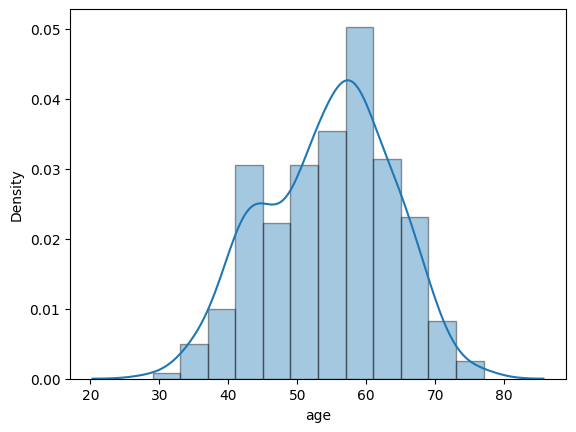

In [23]:
sns.distplot(df["age"], hist_kws = dict(linewidth = 1, edgecolor = "k"));

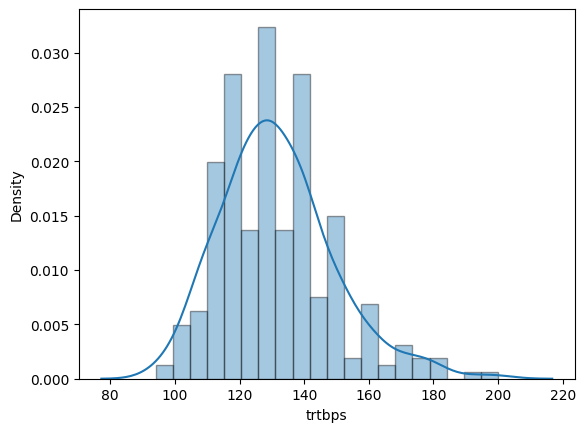

In [24]:
sns.distplot(df["trtbps"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20);

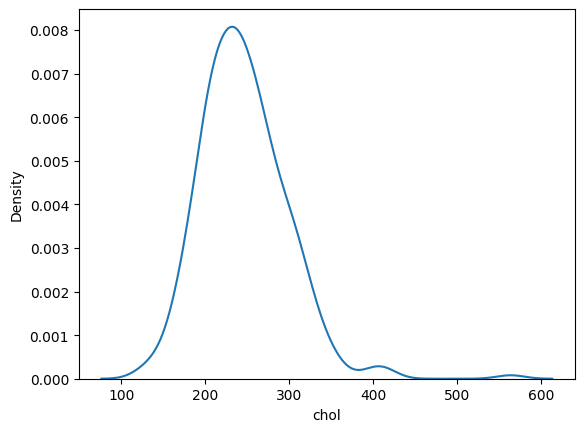

In [28]:
sns.distplot(df["chol"], hist = False);

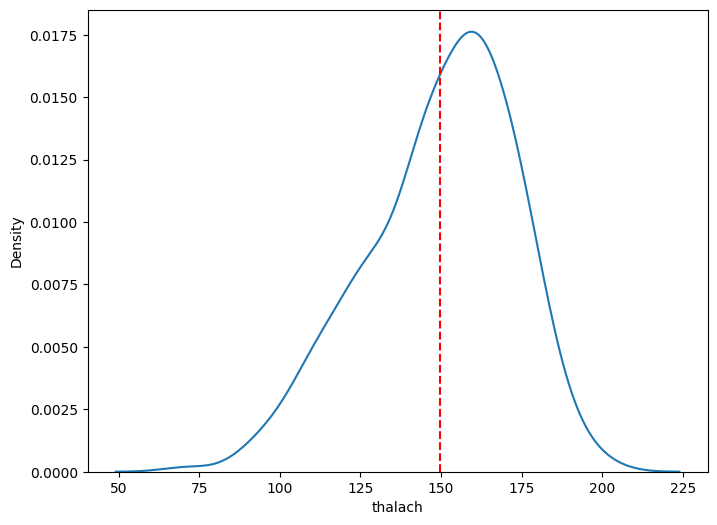

In [29]:
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["thalach"], hist = False, ax = y)
y.axvline(df["thalach"].mean(), color = "r", ls = "--");

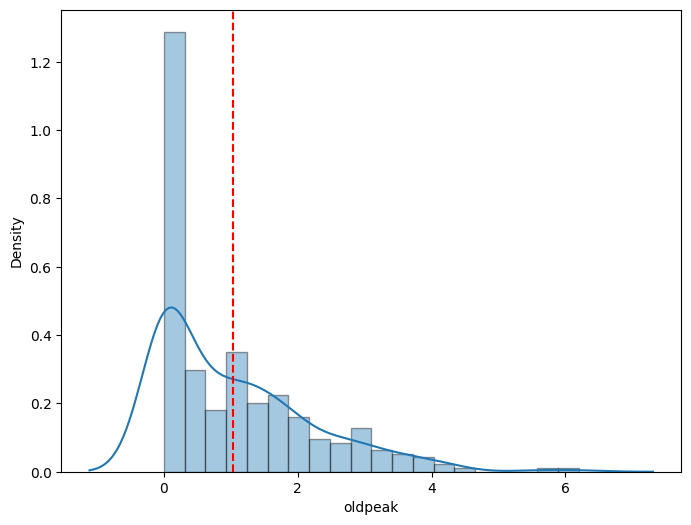

In [30]:
x, y = plt.subplots(figsize = (8, 6))
sns.distplot(df["oldpeak"], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20, ax = y)
y.axvline(df["oldpeak"].mean(), color = "r", ls = "--");

# Exploratory Data Analysis (EDA)

## 4.1 Uni-variate Analysis

### 4.1.1 Numeric Variables (Analysis with Distplot)

In [31]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [42]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure", "Cholestorel Level", "Maximum Heart Rate Achieved", "ST Depression"]

In [43]:
list(zip(numeric_var, numeric_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholestorel Level'),
 ('thalach', 'Maximum Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

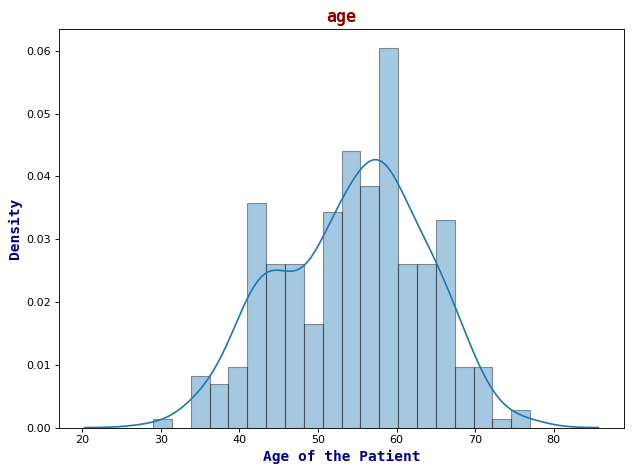

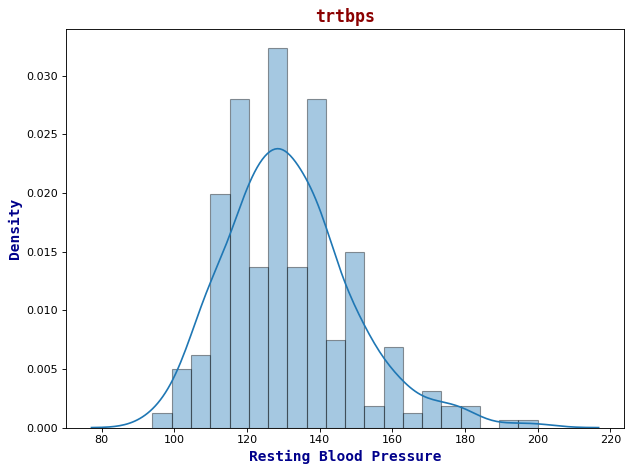

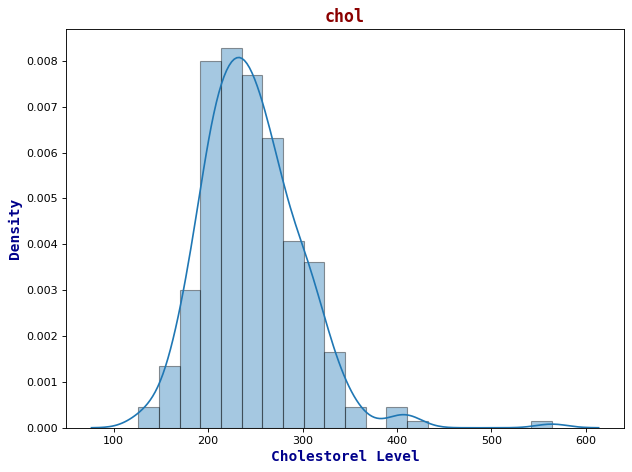

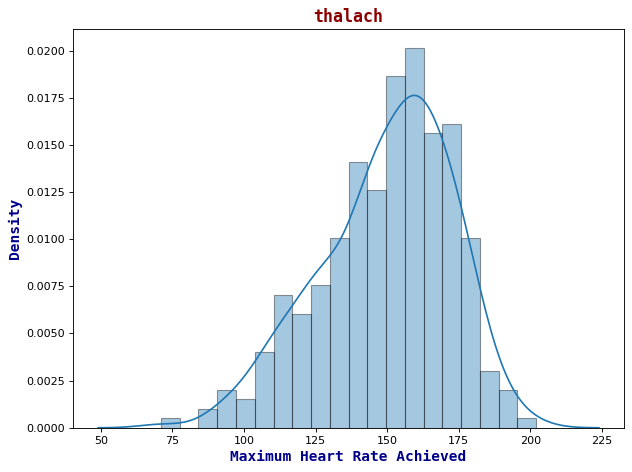

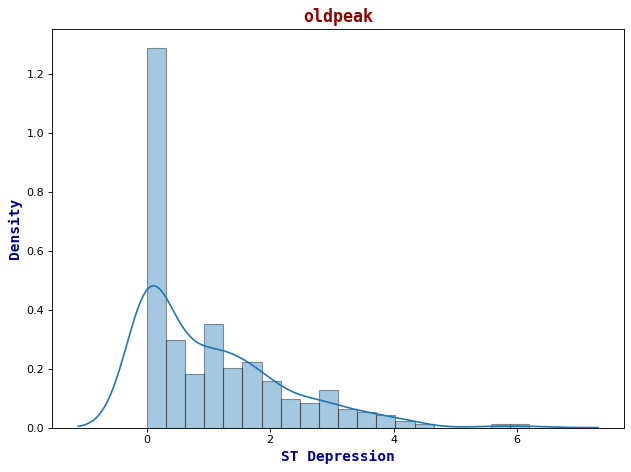

In [45]:
title_font = {"family" : "monospace", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "monospace", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
  plt.figure(figsize = (8, 6), dpi = 80)
  sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20);

  plt.title(i, fontdict = title_font)
  plt.xlabel(z, fontdict = axis_font)
  plt.ylabel("Density", fontdict = axis_font)

  plt.tight_layout()
  plt.show()